# Khai báo thư viện

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# ------------------------------------------------------------------
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from tabulate import tabulate
# ------------------------------------------------------------------
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
# ------------------------------------------------------------------
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Data

In [34]:
df = pd.read_csv("C:/Users/Hali/Documents/Python/Mall_Customers_preprocessed.csv")
X = df.drop(columns=["customerid"])

In [35]:
data = df.drop(columns=["customerid",],axis=1,)
X = data.copy()

In [36]:
print(f"Mall_Customers_preprocessed")
print(tabulate(X.head(), headers='keys', tablefmt='grid'))

Mall_Customers_preprocessed
+----+-----------+-----------------+------------------+----------------+
|    |       age |   annual_income |   spending_score |   genre_Female |
+====+===========+=================+==================+================+
|  0 | -1.42457  |        -1.739   |        -0.434801 |              0 |
+----+-----------+-----------------+------------------+----------------+
|  1 | -1.28104  |        -1.739   |         1.1957   |              0 |
+----+-----------+-----------------+------------------+----------------+
|  2 | -1.3528   |        -1.70083 |        -1.71591  |              1 |
+----+-----------+-----------------+------------------+----------------+
|  3 | -1.1375   |        -1.70083 |         1.04042  |              1 |
+----+-----------+-----------------+------------------+----------------+
|  4 | -0.563369 |        -1.66266 |        -0.39598  |              1 |
+----+-----------+-----------------+------------------+----------------+


# Vẽ biểu đồ Dendrogram - Thể hiện khoảng cách các cụm

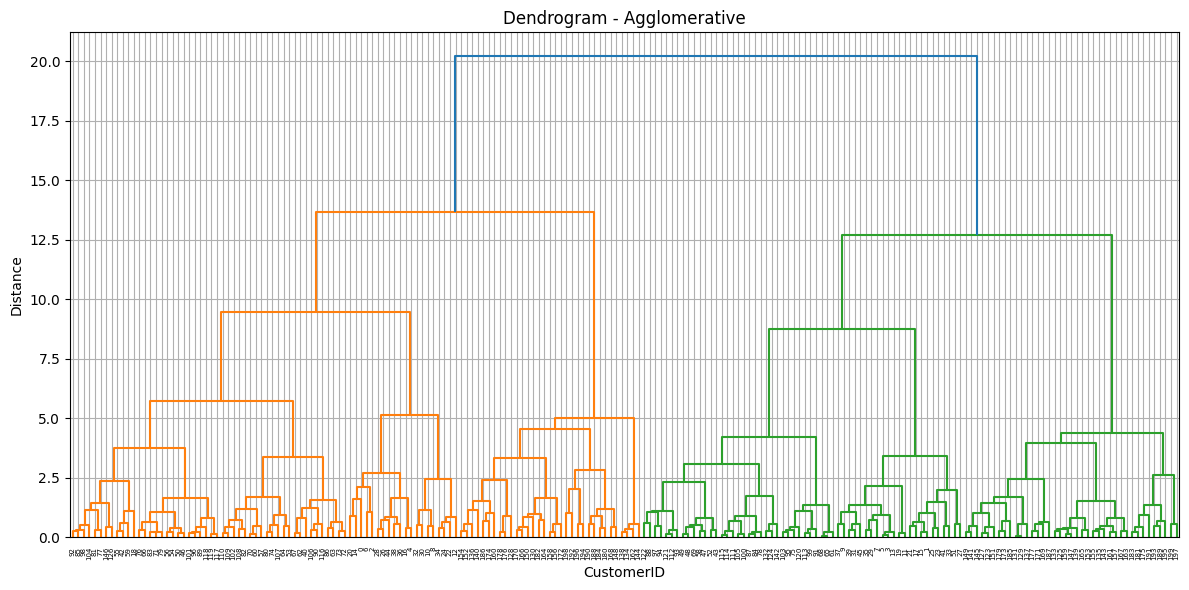

In [37]:
linked = linkage(X, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Dendrogram - Agglomerative")
plt.xlabel("CustomerID")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

# Thực hiện Agglomerative

In [38]:
agg = AgglomerativeClustering(n_clusters=6, linkage='ward') #Số lượng cụm đã được Optimize
agg_labels = agg.fit_predict(X)
n_clusters_agg = len(np.unique(agg_labels))
silhouette_agg = silhouette_score(X, agg_labels)
davies_bouldin_agg = davies_bouldin_score(X, agg_labels)
calinski_harabasz_agg = calinski_harabasz_score(X, agg_labels)

In [39]:
print(f"Agglomerative:")
print(f"- Số lượng cụm: {n_clusters_agg}")
print(f"- Silhouette Score: {silhouette_agg:.3f}")
print(f"- Davies Bouldin: {davies_bouldin_agg:.3f}")
print(f"- Calinski Harabaz: {calinski_harabasz_agg:.3f}")

Agglomerative:
- Số lượng cụm: 6
- Silhouette Score: 0.350
- Davies Bouldin: 1.009
- Calinski Harabaz: 95.258


# Giảm số chiều về 2

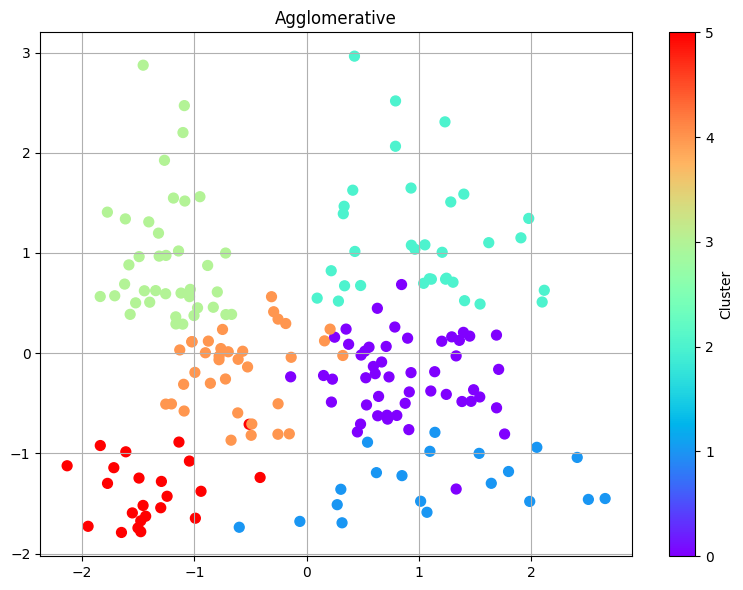

In [40]:
#Giảm số chiều về 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='rainbow', s=50)
plt.title("Agglomerative")
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

# Thực hiện Affnity Propagation Default

In [41]:
ap = AffinityPropagation()
ap_labels = ap.fit_predict(X)
n_clusters_ap = len(np.unique(ap_labels))
silhouette_ap = silhouette_score(X, ap_labels)
davies_bouldin_ap = davies_bouldin_score(X, ap_labels)
calinski_harabasz_ap = calinski_harabasz_score(X, ap_labels)

In [42]:
print(f"Affinity Propagation:")
print(f"- Số lượng cụm: {n_clusters_ap}")
print(f"- Silhouette Score: {silhouette_ap:.3f}")
print(f"- Davies Bouldin: {davies_bouldin_ap:.3f}")
print(f"- Calinski Harabaz: {calinski_harabasz_ap:.3f}")

Affinity Propagation:
- Số lượng cụm: 17
- Silhouette Score: 0.340
- Davies Bouldin: 1.025
- Calinski Harabaz: 80.077


# Giảm số chiều về 2

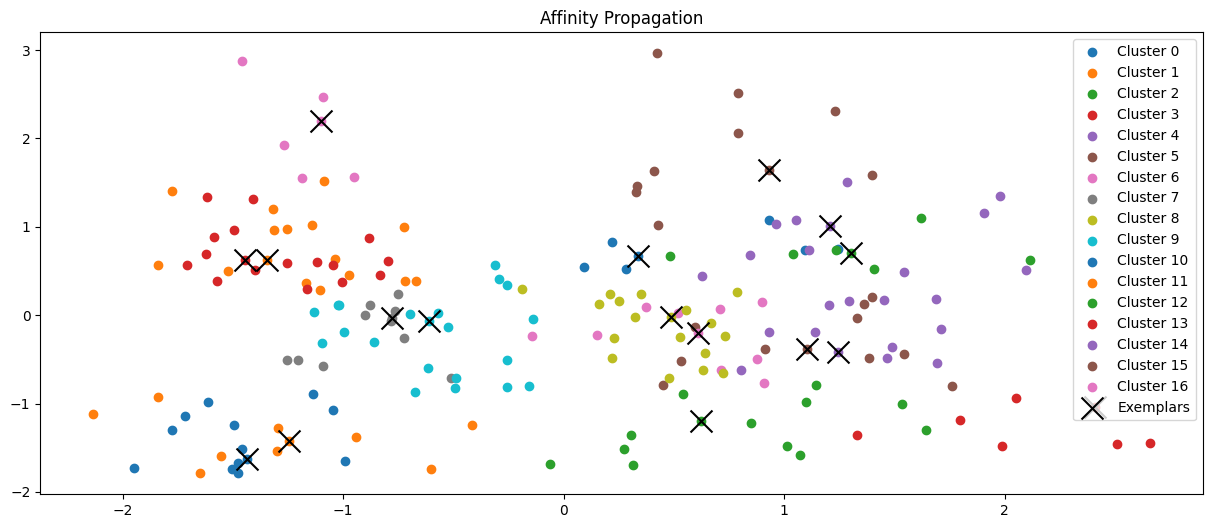

In [43]:
X_2d = PCA(n_components=2).fit_transform(X)
labels = ap.labels_
exemplars = ap.cluster_centers_indices_

plt.figure(figsize=(15, 6))
for cluster in set(labels):
    plt.scatter(
        X_2d[labels == cluster, 0],
        X_2d[labels == cluster, 1],
        label=f"Cluster {cluster}",
    )

plt.scatter(
    X_2d[exemplars, 0],
    X_2d[exemplars, 1],
    c="black",
    marker="x",
    s=250,
    label="Exemplars",
    edgecolors="white",
)

plt.legend()
plt.title("Affinity Propagation")
plt.show()

# Bảng so sánh

In [44]:
results = pd.DataFrame([
    {
        "Thuật toán": "Affinity Propagation",
        "Số cụm": n_clusters_ap,
        "Silhouette": round(silhouette_ap, 3),
        "Davies-Bouldin": round(davies_bouldin_ap, 3),
        "Calinski-Harabasz": round(calinski_harabasz_ap, 3)
    },
    {
        "Thuật toán": "Agglomerative",
        "Số cụm": 4,
        "Silhouette": round(silhouette_agg, 3),
        "Davies-Bouldin": round(davies_bouldin_agg, 3),
        "Calinski-Harabasz": round(calinski_harabasz_agg, 3)
    }
])

In [45]:
print("\nBảng so sánh kết quả phân cụm:")
print(tabulate(results, headers='keys', tablefmt='grid'))


Bảng so sánh kết quả phân cụm:
+----+----------------------+----------+--------------+------------------+---------------------+
|    | Thuật toán           |   Số cụm |   Silhouette |   Davies-Bouldin |   Calinski-Harabasz |
+====+======================+==========+==============+==================+=====================+
|  0 | Affinity Propagation |       17 |         0.34 |            1.025 |              80.077 |
+----+----------------------+----------+--------------+------------------+---------------------+
|  1 | Agglomerative        |        4 |         0.35 |            1.009 |              95.258 |
+----+----------------------+----------+--------------+------------------+---------------------+
